In [1]:
import numpy as np
import pandas as pd

In [2]:
cust_Acquisition_df=pd.read_csv('Customer Acqusition.csv')
cust_Acquisition_df

No Customer  Age        City   Product     Limit Company        Segment
0     1       A1   76   BANGALORE      Gold  500000.0      C1  Self Employed
1     2       A2   71    CALCUTTA    Silver  100000.0      C2   Salaried_MNC
2     3       A3   34      COCHIN  Platimum   10000.0      C3   Salaried_Pvt
3     4       A4   47      BOMBAY  Platimum   10001.0      C4           Govt
4     5       A5   56   BANGALORE  Platimum   10002.0      C5  Normal Salary
..  ...      ...  ...         ...       ...       ...     ...            ...
95   96      A96   54     CHENNAI    Silver  100000.0     C19   Salaried_Pvt
96   97      A97   58  TRIVANDRUM  Platimum   10000.0     C20           Govt
97   98      A98   51    CALCUTTA  Platimum   10001.0     C21  Normal Salary
98   99      A99   35    CALCUTTA  Platimum   10002.0     C22  Self Employed
99  100     A100   36      COCHIN    Silver  100000.0      C5   Salaried_MNC

[100 rows x 8 columns]

In [3]:
repayment_df=pd.read_csv('Repayment.csv')
repayment_df

SL No: Customer      Month     Amount  Unnamed: 4
0        NaN       A1  12-Jan-04  495414.75         NaN
1        2.0       A1   3-Jan-04  245899.02         NaN
2        3.0       A1  15-Jan-04  259490.06         NaN
3        4.0       A1  25-Jan-04  437555.12         NaN
4        5.0       A1  17-Jan-05  165972.88         NaN
...      ...      ...        ...        ...         ...
1518     NaN      NaN        NaN        NaN         NaN
1519     NaN      NaN        NaN        NaN         NaN
1520     NaN      NaN        NaN        NaN         NaN
1521     NaN      NaN        NaN        NaN         NaN
1522     NaN      NaN        NaN        NaN         NaN

[1523 rows x 5 columns]

In [4]:
spend_df=pd.read_csv('spend.csv')
spend_df

Sl No: Customer      Month        Type     Amount
0          1       A1  12-Jan-04   JEWELLERY  485470.80
1          2       A1   3-Jan-04       PETRO  410556.13
2          3       A1  15-Jan-04     CLOTHES   23740.46
3          4       A1  25-Jan-04        FOOD  484342.47
4          5       A1  17-Jan-05      CAMERA  369694.07
...      ...      ...        ...         ...        ...
1495    1496      A67   4-Feb-06  BUS TICKET  356872.73
1496    1497      A68  25-Mar-06  BUS TICKET  204971.10
1497    1498      A69  31-Mar-06  BUS TICKET   50449.44
1498    1499      A70  23-Mar-06  BUS TICKET   80593.94
1499    1500      A71  24-Mar-06  BUS TICKET  194447.62

[1500 rows x 5 columns]

In [20]:
#1.

# a. Replace age less than 18 with mean of age values

mean_age = cust_Acquisition_df['Age'].mean()
cust_Acquisition_df.loc[cust_Acquisition_df['Age'] < 18, 'Age'] = mean_age

# b. Replace spend amount more than limit with 50% of customer's limit

for index, row in spend_df.iterrows():
    customer_id = row['Customer']
    Limit_row = cust_Acquisition_df[cust_Acquisition_df['Customer'] == customer_id]
    if not Limit_row.empty:
        Limit = Limit_row['Limit'].values[0]
        if row['Amount'] > Limit:
            spend_df.at[index, 'Amount'] = Limit * 0.5

# c. Replace repayment amount more than limit with the limit

for index, row in repayment_df.iterrows():
    customer_id = row['Customer']
    Limit_row = cust_Acquisition_df[cust_Acquisition_df['Customer'] == customer_id]
    if not Limit_row.empty:
        Limit = Limit_row['Limit'].values[0]
        if row['Amount'] > Limit:
            repayment_df.at[index, 'Amount'] = Limit

# Output the modified datasets

cust_Acquisition_df.to_csv("modified_customer_acquisition.csv", index=False)
spend_df.to_csv("modified_spend.csv", index=False)
repayment_df.to_csv("modified_repayment.csv", index=False)

In [21]:
#2 a. How many distinct customers exist?


distinct_customers = len(cust_Acquisition_df['Customer'].unique())
print("a. How many distinct customers exist?", distinct_customers)


a. How many distinct customers exist? 100


In [23]:
#2  b. How many distinct categories exist?

distinct_categories = len(spend_df['Type'].unique())
print("b. How many distinct categories exist?", distinct_categories)

b. How many distinct categories exist? 15


In [25]:
#2 c. What is the average monthly spend by customers?


spend_df['Month'] = pd.to_datetime(spend_df['Month']).dt.month
average_monthly_spend = spend_df.groupby(['Customer', 'Month'])['Amount'].sum().mean()
print("c. What is the average monthly spend by customers?", average_monthly_spend)


c. What is the average monthly spend by customers? 380244.09209342557


C:\Users\91954\AppData\Local\Temp\ipykernel_15636\751779934.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spend_df['Month'] = pd.to_datetime(spend_df['Month']).dt.month


In [27]:
#2 d. What is the average monthly repayment by customers?


repayment_df['Month'] = pd.to_datetime(repayment_df['Month']).dt.month
average_monthly_repayment = repayment_df.groupby(['Customer', 'Month'])['Amount'].sum().mean()
print("d. What is the average monthly repayment by customers?", average_monthly_repayment)


d. What is the average monthly repayment by customers? 439036.48761648743


C:\Users\91954\AppData\Local\Temp\ipykernel_15636\3972489538.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  repayment_df['Month'] = pd.to_datetime(repayment_df['Month']).dt.month


In [28]:
#2 e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?


spend_df['Month'] = pd.to_datetime(spend_df['Month']).dt.month
monthly_profit = (repayment_df.groupby(['Customer', 'Month'])['Amount'].sum() - 
                  spend_df.groupby(['Customer', 'Month'])['Amount'].sum())
monthly_interest_earned = monthly_profit[monthly_profit > 0] * 0.029
total_profit = monthly_interest_earned.sum()
print("e. Profit for the bank for each month:", total_profit)


e. Profit for the bank for each month: 14131.973470000003


In [29]:
#2 f. What are the top 5 product types?


top_product_types = spend_df['Type'].value_counts().head(5)
print("f. Top 5 product types:\n", top_product_types)


f. Top 5 product types:
 Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: count, dtype: int64


In [30]:
#2 g. Which city is having maximum spend?

city_max_spend = cust_Acquisition_df.merge(spend_df, on='Customer').groupby('City')['Amount'].sum().idxmax()
print("g. City having maximum spend:", city_max_spend)

g. City having maximum spend: COCHIN


In [31]:
#2 h. Which age group is spending more money?


bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '>=60']
cust_Acquisition_df['Age'] = pd.cut(cust_Acquisition_df['Age'], bins=bins, labels=labels, right=False)
age_group_spend = cust_Acquisition_df.merge(spend_df, on='Customer').groupby('Age')['Amount'].sum().idxmax()
print("h. Age group spending more money:", age_group_spend)

h. Age group spending more money: 20-29


In [32]:
#2 i. Who are the top 10 customers in terms of repayment?


top_10_customers_repayment = repayment_df.groupby('Customer')['Amount'].sum().nlargest(10)
print("i. Top 10 customers in terms of repayment:\n", top_10_customers_repayment)

i. Top 10 customers in terms of repayment:
 Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Amount, dtype: float64


In [1]:
import numpy as np
import pandas as pd


In [5]:
cust_Acquisition_df=pd.read_csv('Customer Acqusition.csv')
cust_Acquisition_df

repayment_df=pd.read_csv('Repayment.csv')
repayment_df

spend_df=pd.read_csv('spend.csv')
spend_df

Sl No: Customer      Month        Type     Amount
0          1       A1  12-Jan-04   JEWELLERY  485470.80
1          2       A1   3-Jan-04       PETRO  410556.13
2          3       A1  15-Jan-04     CLOTHES   23740.46
3          4       A1  25-Jan-04        FOOD  484342.47
4          5       A1  17-Jan-05      CAMERA  369694.07
...      ...      ...        ...         ...        ...
1495    1496      A67   4-Feb-06  BUS TICKET  356872.73
1496    1497      A68  25-Mar-06  BUS TICKET  204971.10
1497    1498      A69  31-Mar-06  BUS TICKET   50449.44
1498    1499      A70  23-Mar-06  BUS TICKET   80593.94
1499    1500      A71  24-Mar-06  BUS TICKET  194447.62

[1500 rows x 5 columns]

In [6]:
repayment_df

SL No: Customer      Month     Amount  Unnamed: 4
0        NaN       A1  12-Jan-04  495414.75         NaN
1        2.0       A1   3-Jan-04  245899.02         NaN
2        3.0       A1  15-Jan-04  259490.06         NaN
3        4.0       A1  25-Jan-04  437555.12         NaN
4        5.0       A1  17-Jan-05  165972.88         NaN
...      ...      ...        ...        ...         ...
1518     NaN      NaN        NaN        NaN         NaN
1519     NaN      NaN        NaN        NaN         NaN
1520     NaN      NaN        NaN        NaN         NaN
1521     NaN      NaN        NaN        NaN         NaN
1522     NaN      NaN        NaN        NaN         NaN

[1523 rows x 5 columns]

In [7]:
cust_Acquisition_df

No Customer  Age        City   Product     Limit Company        Segment
0     1       A1   76   BANGALORE      Gold  500000.0      C1  Self Employed
1     2       A2   71    CALCUTTA    Silver  100000.0      C2   Salaried_MNC
2     3       A3   34      COCHIN  Platimum   10000.0      C3   Salaried_Pvt
3     4       A4   47      BOMBAY  Platimum   10001.0      C4           Govt
4     5       A5   56   BANGALORE  Platimum   10002.0      C5  Normal Salary
..  ...      ...  ...         ...       ...       ...     ...            ...
95   96      A96   54     CHENNAI    Silver  100000.0     C19   Salaried_Pvt
96   97      A97   58  TRIVANDRUM  Platimum   10000.0     C20           Govt
97   98      A98   51    CALCUTTA  Platimum   10001.0     C21  Normal Salary
98   99      A99   35    CALCUTTA  Platimum   10002.0     C22  Self Employed
99  100     A100   36      COCHIN    Silver  100000.0      C5   Salaried_MNC

[100 rows x 8 columns]

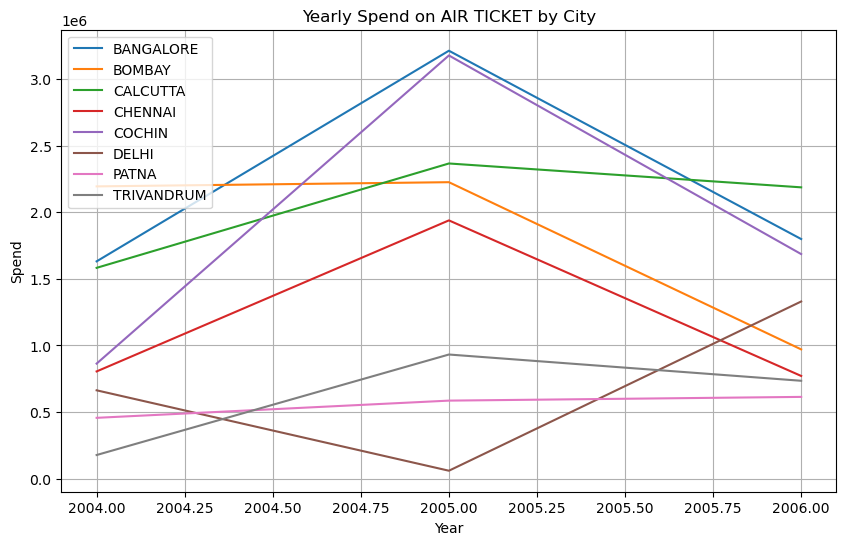

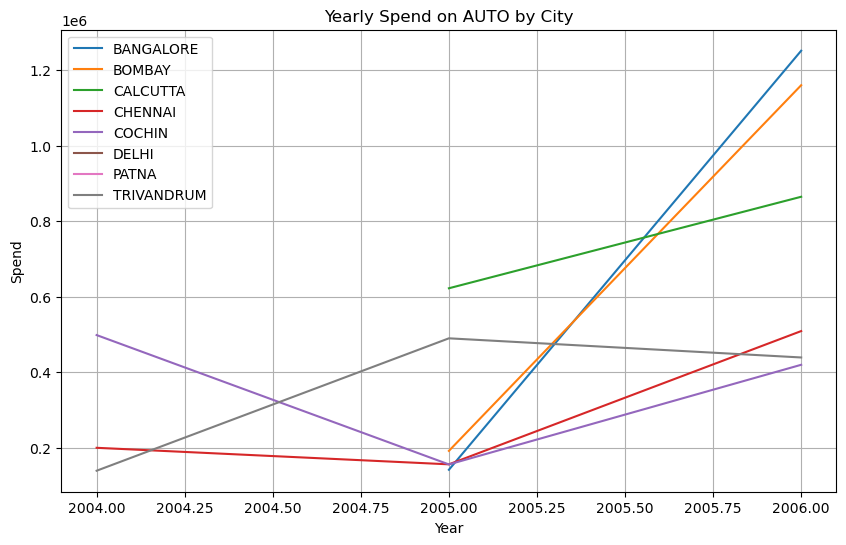

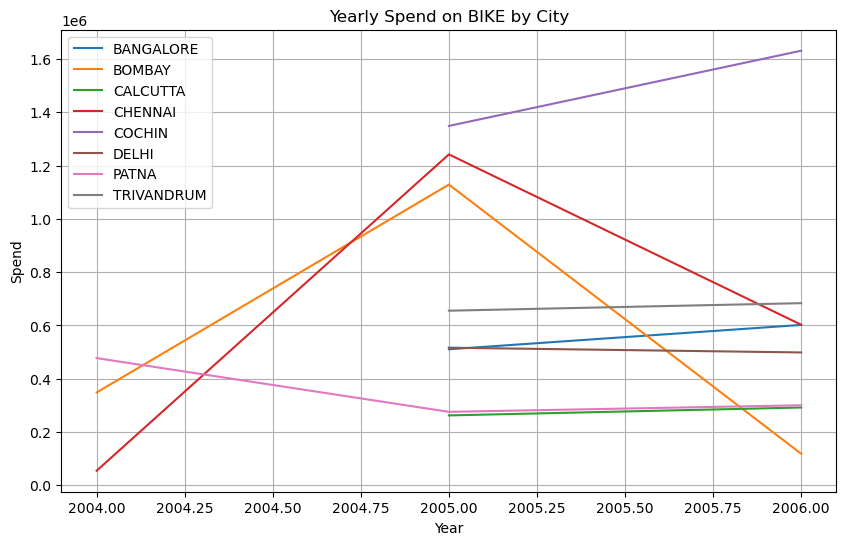

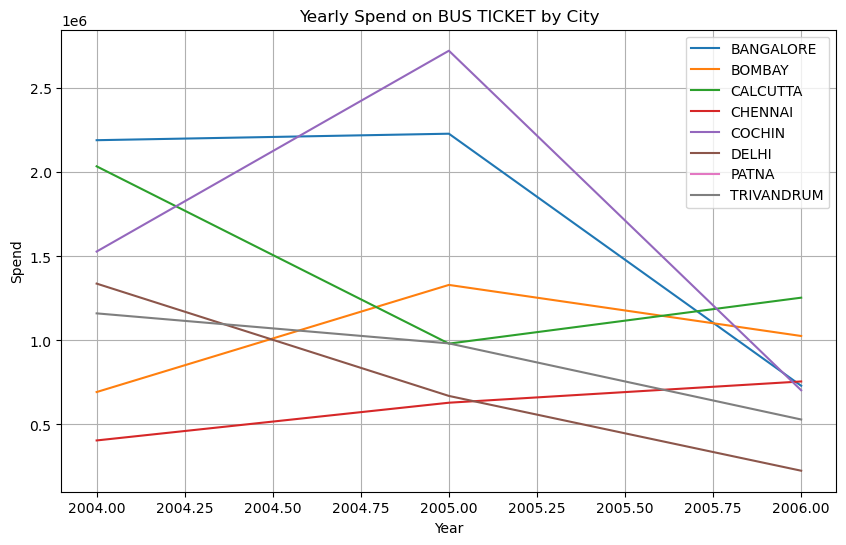

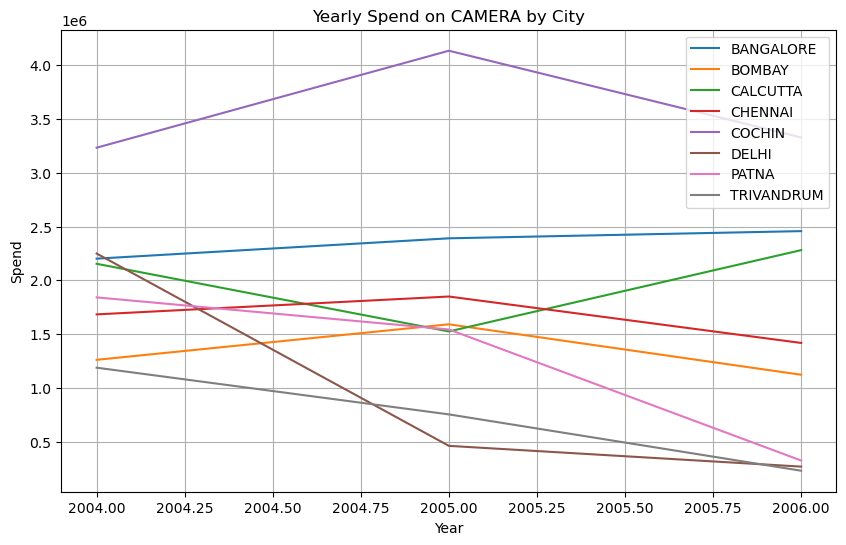

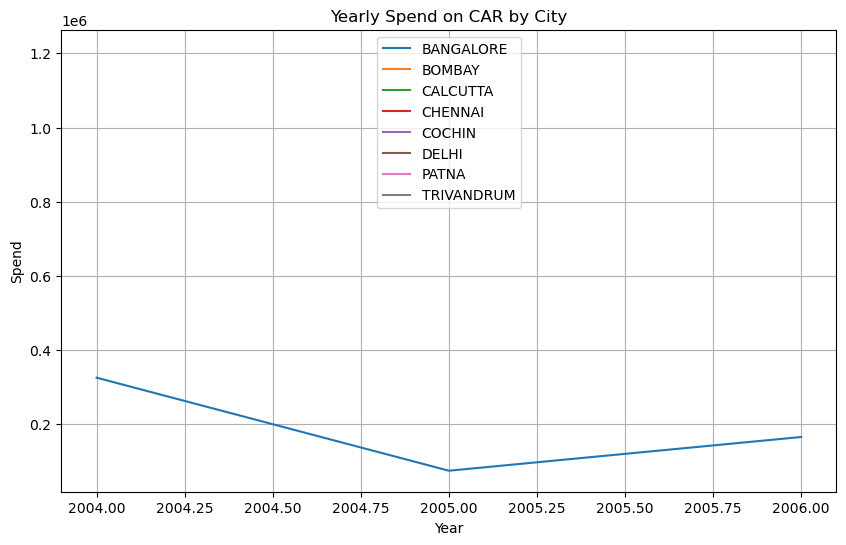

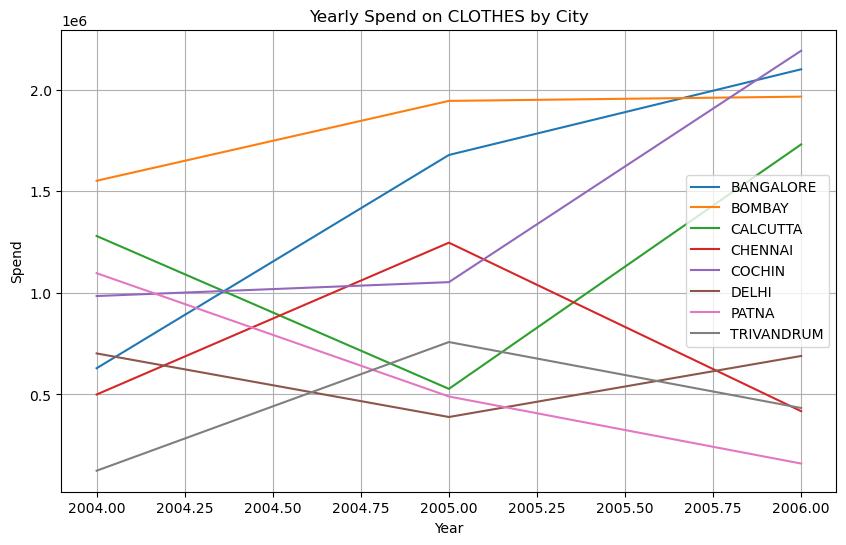

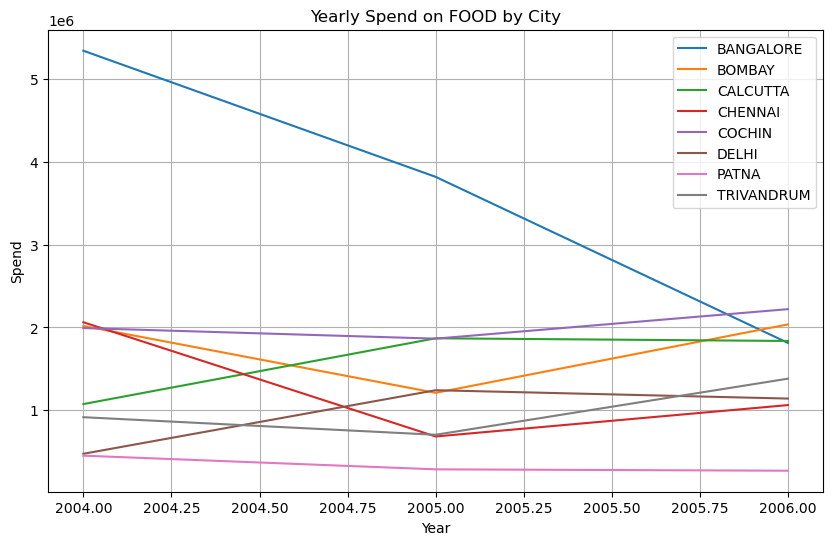

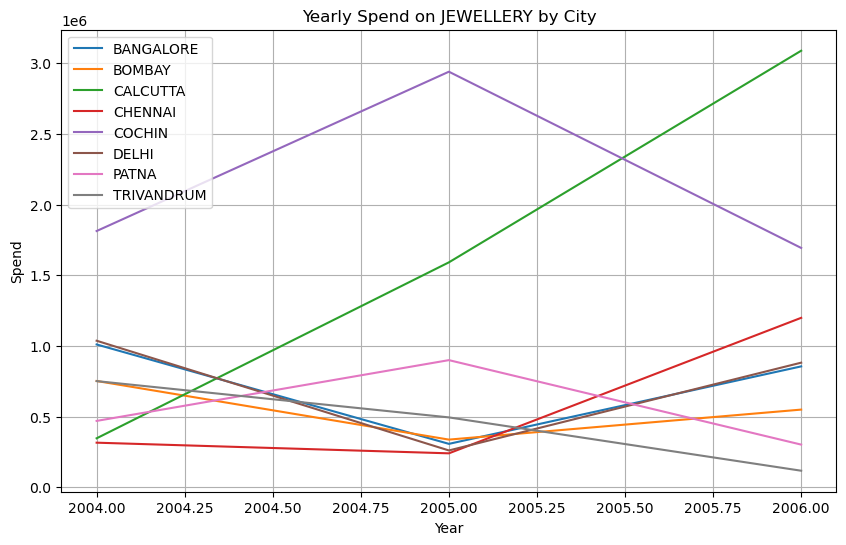

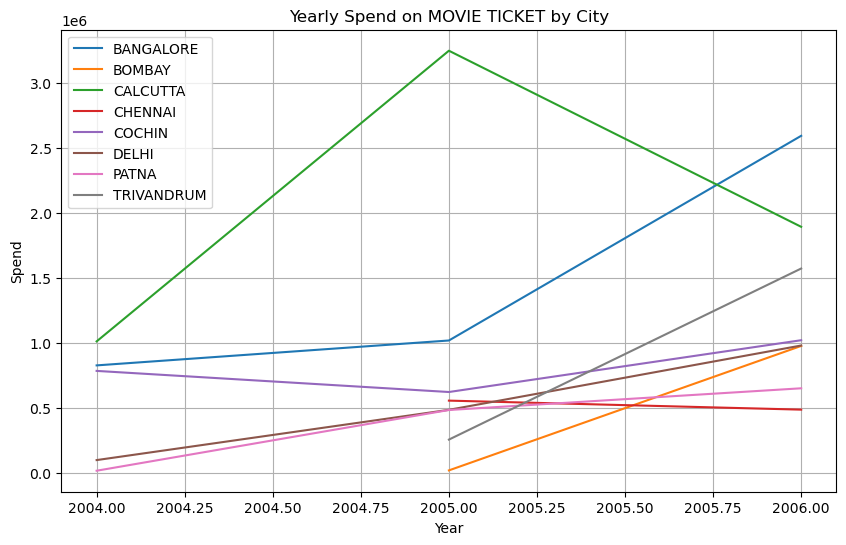

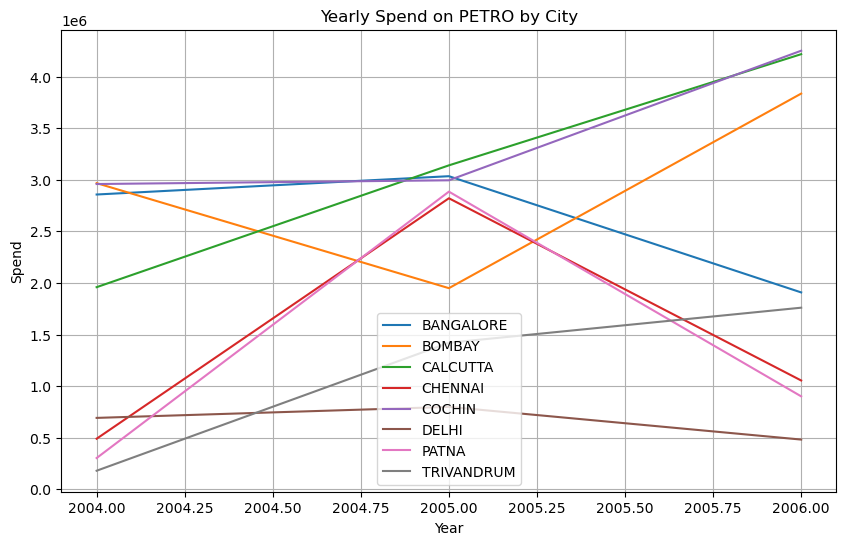

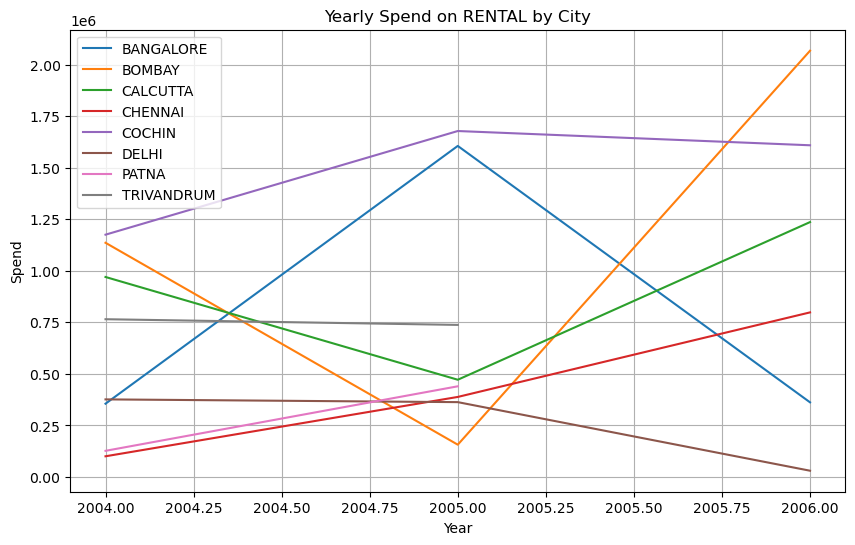

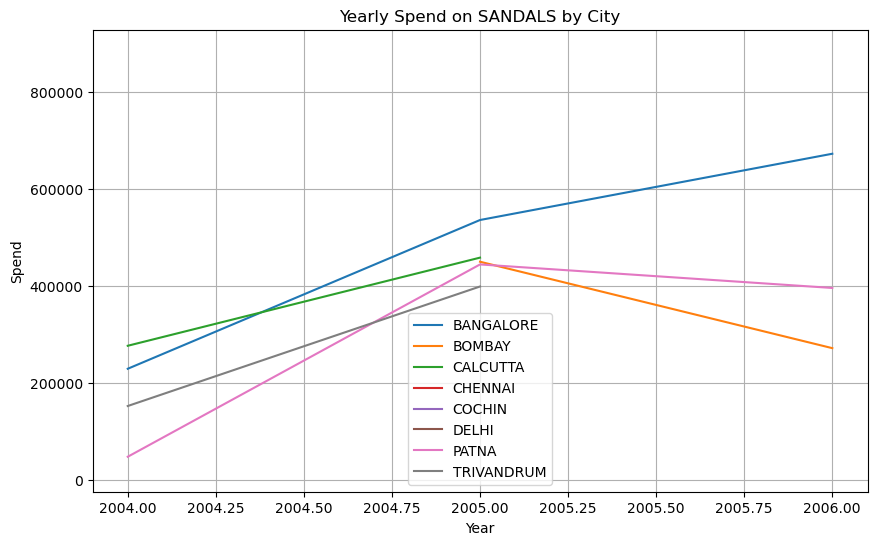

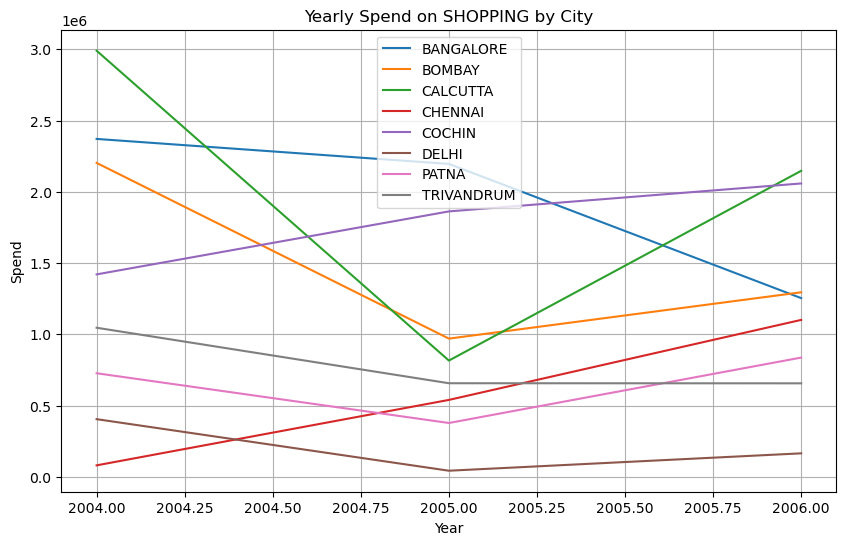

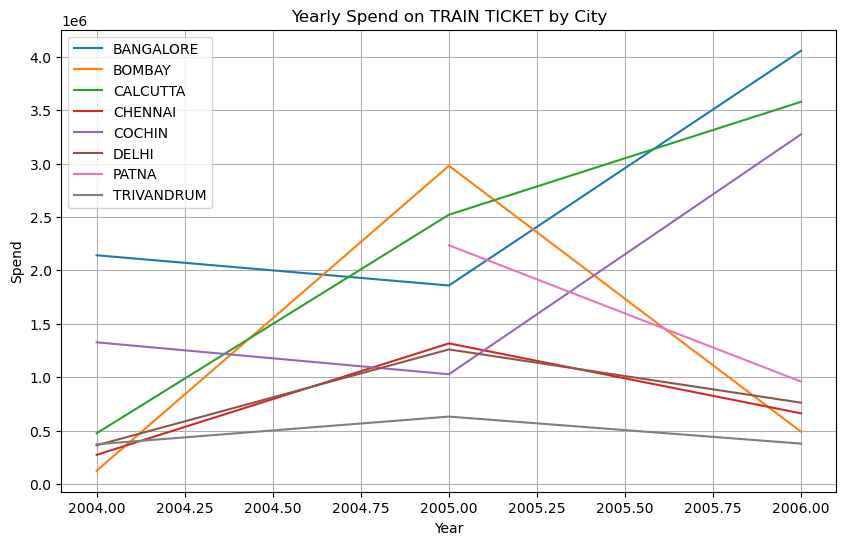

In [16]:
#3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

import pandas as pd
import matplotlib.pyplot as plt


# Merge the spend data with customer acquisition data to include the 'City' information
merged_df = pd.merge(spend_df, cust_Acquisition_df[['Customer', 'City']], left_on='Customer', right_on='Customer', how='left')

# Group by 'City', 'Type' (or 'Product'), and 'Year' and sum the 'Amount' column
city_product_yearly_spend = merged_df.groupby(['City', 'Type', merged_df['Month'].dt.year])['Amount'].sum().reset_index()

# Pivot the table to have cities as rows, products as columns, and yearly spend as values
city_product_yearly_spend_pivot = city_product_yearly_spend.pivot_table(index=['City', 'Month'], columns='Type', values='Amount', aggfunc='sum')

# Reset index to flatten the pivot table
city_product_yearly_spend_pivot = city_product_yearly_spend_pivot.reset_index()

# Plotting
products = city_product_yearly_spend_pivot.columns[2:]

for product in products:
    plt.figure(figsize=(10, 6))
    for city in city_product_yearly_spend_pivot['City'].unique():
        data = city_product_yearly_spend_pivot[city_product_yearly_spend_pivot['City'] == city]
        plt.plot(data['Month'], data[product], label=city)
    plt.title(f'Yearly Spend on {product} by City')
    plt.xlabel('Year')
    plt.ylabel('Spend')
    plt.legend()
    plt.grid(True)
    plt.show()


In [18]:
print(repayment_df.columns.tolist())


['SL No:', 'Customer', 'Month', 'Amount', 'Unnamed: 4']


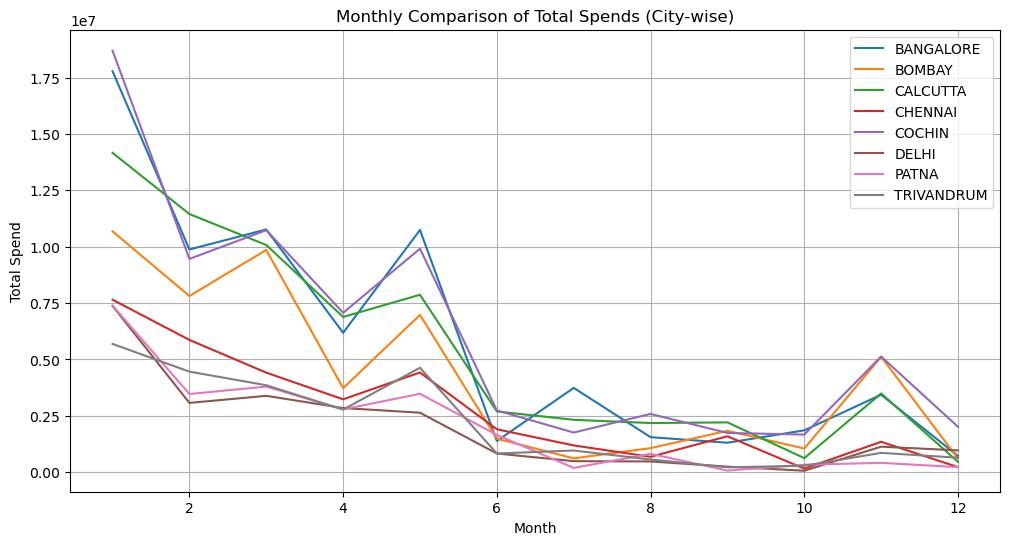

In [19]:
#4 a. Monthly comparison of total spends, city wise

city_monthly_total_spend = merged_df.groupby(['City', merged_df['Month'].dt.month])['Amount'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
for city in city_monthly_total_spend['City'].unique():
    data = city_monthly_total_spend[city_monthly_total_spend['City'] == city]
    plt.plot(data['Month'], data['Amount'], label=city)
plt.title('Monthly Comparison of Total Spends (City-wise)')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.legend()
plt.grid(True)
plt.show()


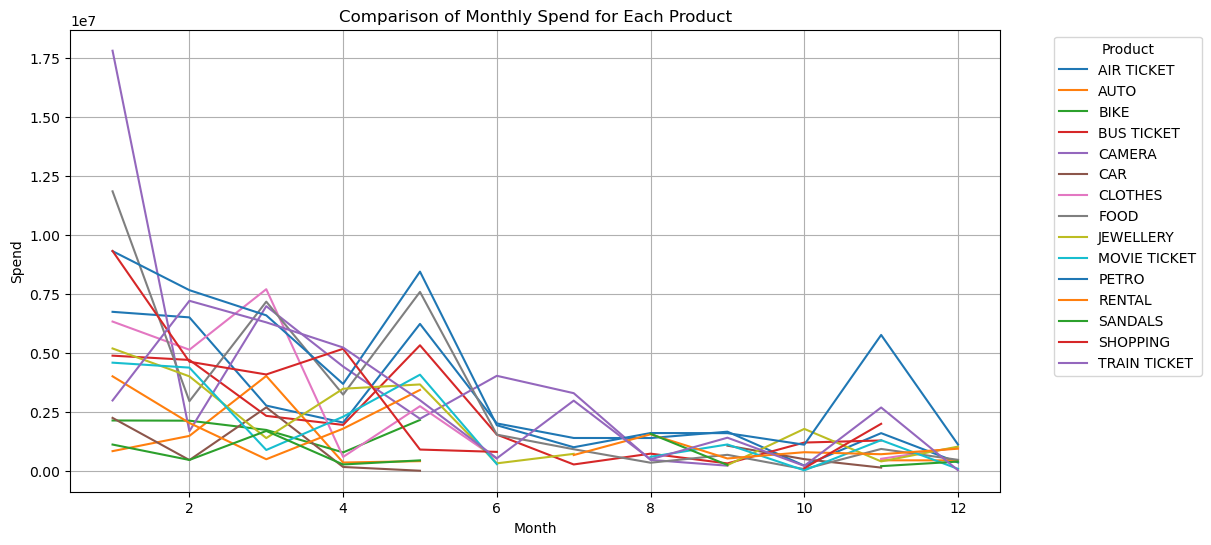

In [23]:
#4 c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)


product_monthly_spend = merged_df.groupby(['Type', merged_df['Month'].dt.month])['Amount'].sum().reset_index()

# Pivot the table to have products as rows, months as columns, and monthly spend as values
product_monthly_spend_pivot = product_monthly_spend.pivot_table(index='Type', columns='Month', values='Amount', aggfunc='sum')

# Plotting
plt.figure(figsize=(12, 6))
for product in product_monthly_spend_pivot.index:
    plt.plot(product_monthly_spend_pivot.columns, product_monthly_spend_pivot.loc[product], label=product)
plt.title('Comparison of Monthly Spend for Each Product')
plt.xlabel('Month')
plt.ylabel('Spend')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



In [50]:
#5 Write user defined PYTHON function to perform the following analysis:
#You need to find top 10 customers for each city in terms of their repayment amount by 
#different products and by different time periods i.e. year or month. The user should be able 
#to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
#function should automatically take these inputs while identifying the top 10 customers

import pandas as pd

def top_customers_by_repayment(merged_df, city, product, time_period):
    # Rename the duplicate columns to avoid confusion
    merged_df.rename(columns={'Spend_Month': 'Month', 'Spend_Amount': 'Amount'}, inplace=True)
    
    # Filter data for the specified city and product
    filtered_data = merged_df[(merged_df['City'] == city) & (merged_df['Product'] == product)].copy()
    
    # Convert 'Month' column to datetime
    filtered_data['Month'] = pd.to_datetime(filtered_data['Month'])
    
    # Extract year and month from 'Month' column
    if time_period == 'monthly':
        filtered_data['Year'] = filtered_data['Month'].dt.year
        filtered_data['Month'] = filtered_data['Month'].dt.month
    else:
        filtered_data['Year'] = filtered_data['Month'].dt.year
    
    # Group by customer and time period (yearly or monthly) and sum the repayment amount
    grouped_data = filtered_data.groupby(['Customer', 'Year', 'Month'])['Repayment_Amount'].sum().reset_index()
    
    # Get the top 10 customers based on repayment amount
    top_customers = grouped_data.groupby('Customer')['Repayment_Amount'].sum().nlargest(10).reset_index()
    
    return top_customers

# Example usage:
top_customers = top_customers_by_repayment(merged_df, 'BANGALORE', 'Gold', 'monthly')
print(top_customers)


  Customer  Repayment_Amount
0      A13      2.967320e+08
1      A43      2.631860e+08
2      A14      2.462413e+08
3      A30      1.656040e+08
4       A1      8.556645e+07
5      A63      2.999918e+06
6      A92      4.591057e+05
7      A81      2.077803e+05
8      A88      1.468213e+05
